<a href="https://colab.research.google.com/github/dudgus1286/pandas/blob/main/%EB%B6%84%EC%84%9D%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/6_%EC%84%9C%EC%9A%B8%EC%8B%9C_CCTV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 셋 수집
- 서울 열린 데이터 광장
  - 서울시 5대 범죄 발생현황
  - 자치구 년도별 cctv 설치현황
  - 주민등록인구(구별) 통계

In [ ]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 20.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 한글 폰트 설정
import koreanize_matplotlib

import warnings
warnings.simplefilter(action='ignore')

In [ ]:
df_cctv = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/서울시 자치구 CCTV 설치현황.xlsx",
                             usecols="C, E:N", skiprows=2, thousands=",")
df_cctv

,구분,2015년 이전\n설치된 CCTV,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,계,8759,5725,8537,10770,10619,12855,11525,9358,9379,11988
1,종로구,549,158,128,143,142,67,237,82,225,300
2,중 구,275,236,239,372,386,155,364,419,137,135
3,용산구,88,38,295,491,147,335,473,486,500,405
4,성동구,190,352,278,939,457,640,483,366,233,471
5,광진구,309,95,42,666,460,712,191,740,273,340
6,동대문구,8,70,749,670,199,215,229,226,317,585
7,중랑구,334,145,153,170,215,1074,976,507,294,644
8,성북구,281,294,572,448,850,713,226,418,355,421
9,강북구,37,68,210,4,375,963,569,298,797,10


In [ ]:
df_cctv = df_cctv.drop(index = 0)
df_cctv.index = list(range(0, 25))
df_cctv

,구분,2015년 이전\n설치된 CCTV,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,종로구,549,158,128,143,142,67,237,82,225,300
1,중 구,275,236,239,372,386,155,364,419,137,135
2,용산구,88,38,295,491,147,335,473,486,500,405
3,성동구,190,352,278,939,457,640,483,366,233,471
4,광진구,309,95,42,666,460,712,191,740,273,340
5,동대문구,8,70,749,670,199,215,229,226,317,585
6,중랑구,334,145,153,170,215,1074,976,507,294,644
7,성북구,281,294,572,448,850,713,226,418,355,421
8,강북구,37,68,210,4,375,963,569,298,797,10
9,도봉구,3,0,68,80,152,149,156,552,557,661


In [ ]:
df_cctv.shape

(25, 11)

In [ ]:
df_cctv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   구분                 25 non-null     object
 1   2015년 이전
설치된 CCTV  25 non-null     int64 
 2   2015년              25 non-null     int64 
 3   2016년              25 non-null     int64 
 4   2017년              25 non-null     int64 
 5   2018년              25 non-null     int64 
 6   2019년              25 non-null     int64 
 7   2020년              25 non-null     int64 
 8   2021년              25 non-null     int64 
 9   2022년              25 non-null     int64 
 10  2023년              25 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.3+ KB


In [ ]:
# 컬럼명 변경
# 구분 => 구 별, 2015년 이전\n설치된 CCTV => 2015년 이전

df_cctv.rename(columns = {"구분" : "구 별", "2015년 이전\n설치된 CCTV":"2015년 이전"}, inplace=True)

In [ ]:
# 컬럼 생성
df_cctv["2020년 이전"] = df_cctv.iloc[:, 1:8].sum(axis=1)
df_cctv

,구 별,2015년 이전,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2020년 이전
0,종로구,549,158,128,143,142,67,237,82,225,300,1424
1,중 구,275,236,239,372,386,155,364,419,137,135,2027
2,용산구,88,38,295,491,147,335,473,486,500,405,1867
3,성동구,190,352,278,939,457,640,483,366,233,471,3339
4,광진구,309,95,42,666,460,712,191,740,273,340,2475
5,동대문구,8,70,749,670,199,215,229,226,317,585,2140
6,중랑구,334,145,153,170,215,1074,976,507,294,644,3067
7,성북구,281,294,572,448,850,713,226,418,355,421,3384
8,강북구,37,68,210,4,375,963,569,298,797,10,2226
9,도봉구,3,0,68,80,152,149,156,552,557,661,608


In [ ]:
# 컬럼 삭제
# copy() : df_cctv = df_cctv[["구 별", "2021년", "2022년", "2023년", "2020년 이전"]].copy()
# drop()
df_cctv.drop(columns=df_cctv.iloc[:, 1:8].columns, inplace=True)
df_cctv

,구 별,2021년,2022년,2023년,2020년 이전
0,종로구,82,225,300,1424
1,중 구,419,137,135,2027
2,용산구,486,500,405,1867
3,성동구,366,233,471,3339
4,광진구,740,273,340,2475
5,동대문구,226,317,585,2140
6,중랑구,507,294,644,3067
7,성북구,418,355,421,3384
8,강북구,298,797,10,2226
9,도봉구,552,557,661,608


In [ ]:
df_cctv["cctv 총계"]=df_cctv[:].sum(axis=1, numeric_only=True)
df_cctv.head()

,구 별,2021년,2022년,2023년,2020년 이전,cctv 총계
0,종로구,82,225,300,1424,2031
1,중 구,419,137,135,2027,2718
2,용산구,486,500,405,1867,3258
3,성동구,366,233,471,3339,4409
4,광진구,740,273,340,2475,3828


In [ ]:
# 구별 CCTV 가장 적게 설치되어 있는 구
# df_cctv["cctv 총계"].min()

df_cctv[min(df_cctv["cctv 총계"]) == df_cctv["cctv 총계"]]

,구 별,2021년,2022년,2023년,2020년 이전,cctv 총계
0,종로구,82,225,300,1424,2031


In [ ]:
# 구별 CCTV 가장 많이 설치되어 있는 구

df_cctv[max(df_cctv["cctv 총계"]) == df_cctv["cctv 총계"]]

,구 별,2021년,2022년,2023년,2020년 이전,cctv 총계
22,강남구,505,588,446,6182,7721


## 서울시 거주 인구 데이터

In [ ]:
# 주민등록인구(월별)
df_seoul = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/주민등록인구(월별).xlsx",
                       skiprows=[0,1], usecols="B, D, G, J", thousands=",")
df_seoul.drop(index=0, inplace=True)
df_seoul.reset_index().drop(columns="index", inplace=True)

In [ ]:
df_seoul.rename(columns={"소계.1":"총인구", "소계.2":"한국인", "소계.3":"외국인"}, inplace=True)
df_seoul.rename(columns={"동별(2)":"구 별"}, inplace=True)

In [ ]:
# df_cctv["구 별"] : 중 구 ==> 중구로 변경
# df_cctv.loc[1, "구 별"] = '중구'
df_cctv.iloc[1, 0] = '중구'

In [ ]:
df_cctv.head(3)

,구 별,2021년,2022년,2023년,2020년 이전,cctv 총계
0,종로구,82,225,300,1424,2031
1,중구,419,137,135,2027,2718
2,용산구,486,500,405,1867,3258


In [ ]:
# 외국인이 가장 많이 사는 구
# df_seoul[df_seoul["외국인"].max() == df_seoul["외국인"]]

df_seoul.sort_values("외국인", ascending=False, ignore_index=True)

,구 별,총인구,한국인,외국인
0,구로구,413790,390952,22838
1,영등포구,397830,375090,22740
2,동대문구,360472,341981,18491
3,관악구,497938,481722,16216
4,광진구,350624,334790,15834
5,서대문구,320933,306001,14932
6,용산구,221508,207969,13539
7,금천구,240425,226955,13470
8,성북구,437188,424663,12525
9,마포구,374626,363449,11177


In [ ]:
# cctv 설치 대수 대비 범죄율 파악
# df_cctv + df_seoul merge 먼저

# concat() : 위아래(기본), 옆으로 : 간단함
# merge() : sql join 개념

# df_cctv.merge(df_seoul)
df_merge = pd.merge(df_cctv, df_seoul, on="구 별")
df_merge.head()

,구 별,2021년,2022년,2023년,2020년 이전,cctv 총계,총인구,한국인,외국인
0,종로구,82,225,300,1424,2031,150447,139432,11015
1,중구,419,137,135,2027,2718,131886,121607,10279
2,용산구,486,500,405,1867,3258,221508,207969,13539
3,성동구,366,233,471,3339,4409,284141,276847,7294
4,광진구,740,273,340,2475,3828,350624,334790,15834


In [ ]:
# 구 별 인덱스 설정

df_merge.set_index("구 별", inplace=True)

In [ ]:
df_merge['1인당 cctv 비율'] = df_merge['cctv 총계'] / df_merge['총인구'] * 100

In [ ]:
df_merge.head()

,2021년,2022년,2023년,2020년 이전,cctv 총계,총인구,한국인,외국인,1인당 cctv 비율
구 별,,,,,,,,,
종로구,82,225,300,1424,2031,150447,139432,11015,1.349977
중구,419,137,135,2027,2718,131886,121607,10279,2.060871
용산구,486,500,405,1867,3258,221508,207969,13539,1.470827
성동구,366,233,471,3339,4409,284141,276847,7294,1.551694
광진구,740,273,340,2475,3828,350624,334790,15834,1.091768


In [ ]:
# 상관관계 분석 : 두 변수 간에 어떤 선형적 관계를 갖고 있는지 분석
# 상관계수는 -1 ~ +1 사이의 값, -1 이나 +1에 가까울수록 상관관계가 높아짐
# - 는 부정적인 관계, + 는 양의 상관관계
# 0 은 관계없음

# 총 인구와 CCTV 총계가 어떤 관계가 있는가

df_merge['총인구'].corr(df_merge["cctv 총계"], method="spearman")

0.5538461538461539

In [ ]:
df_merge['외국인'].corr(df_merge["cctv 총계"], method="spearman")

0.06538461538461539

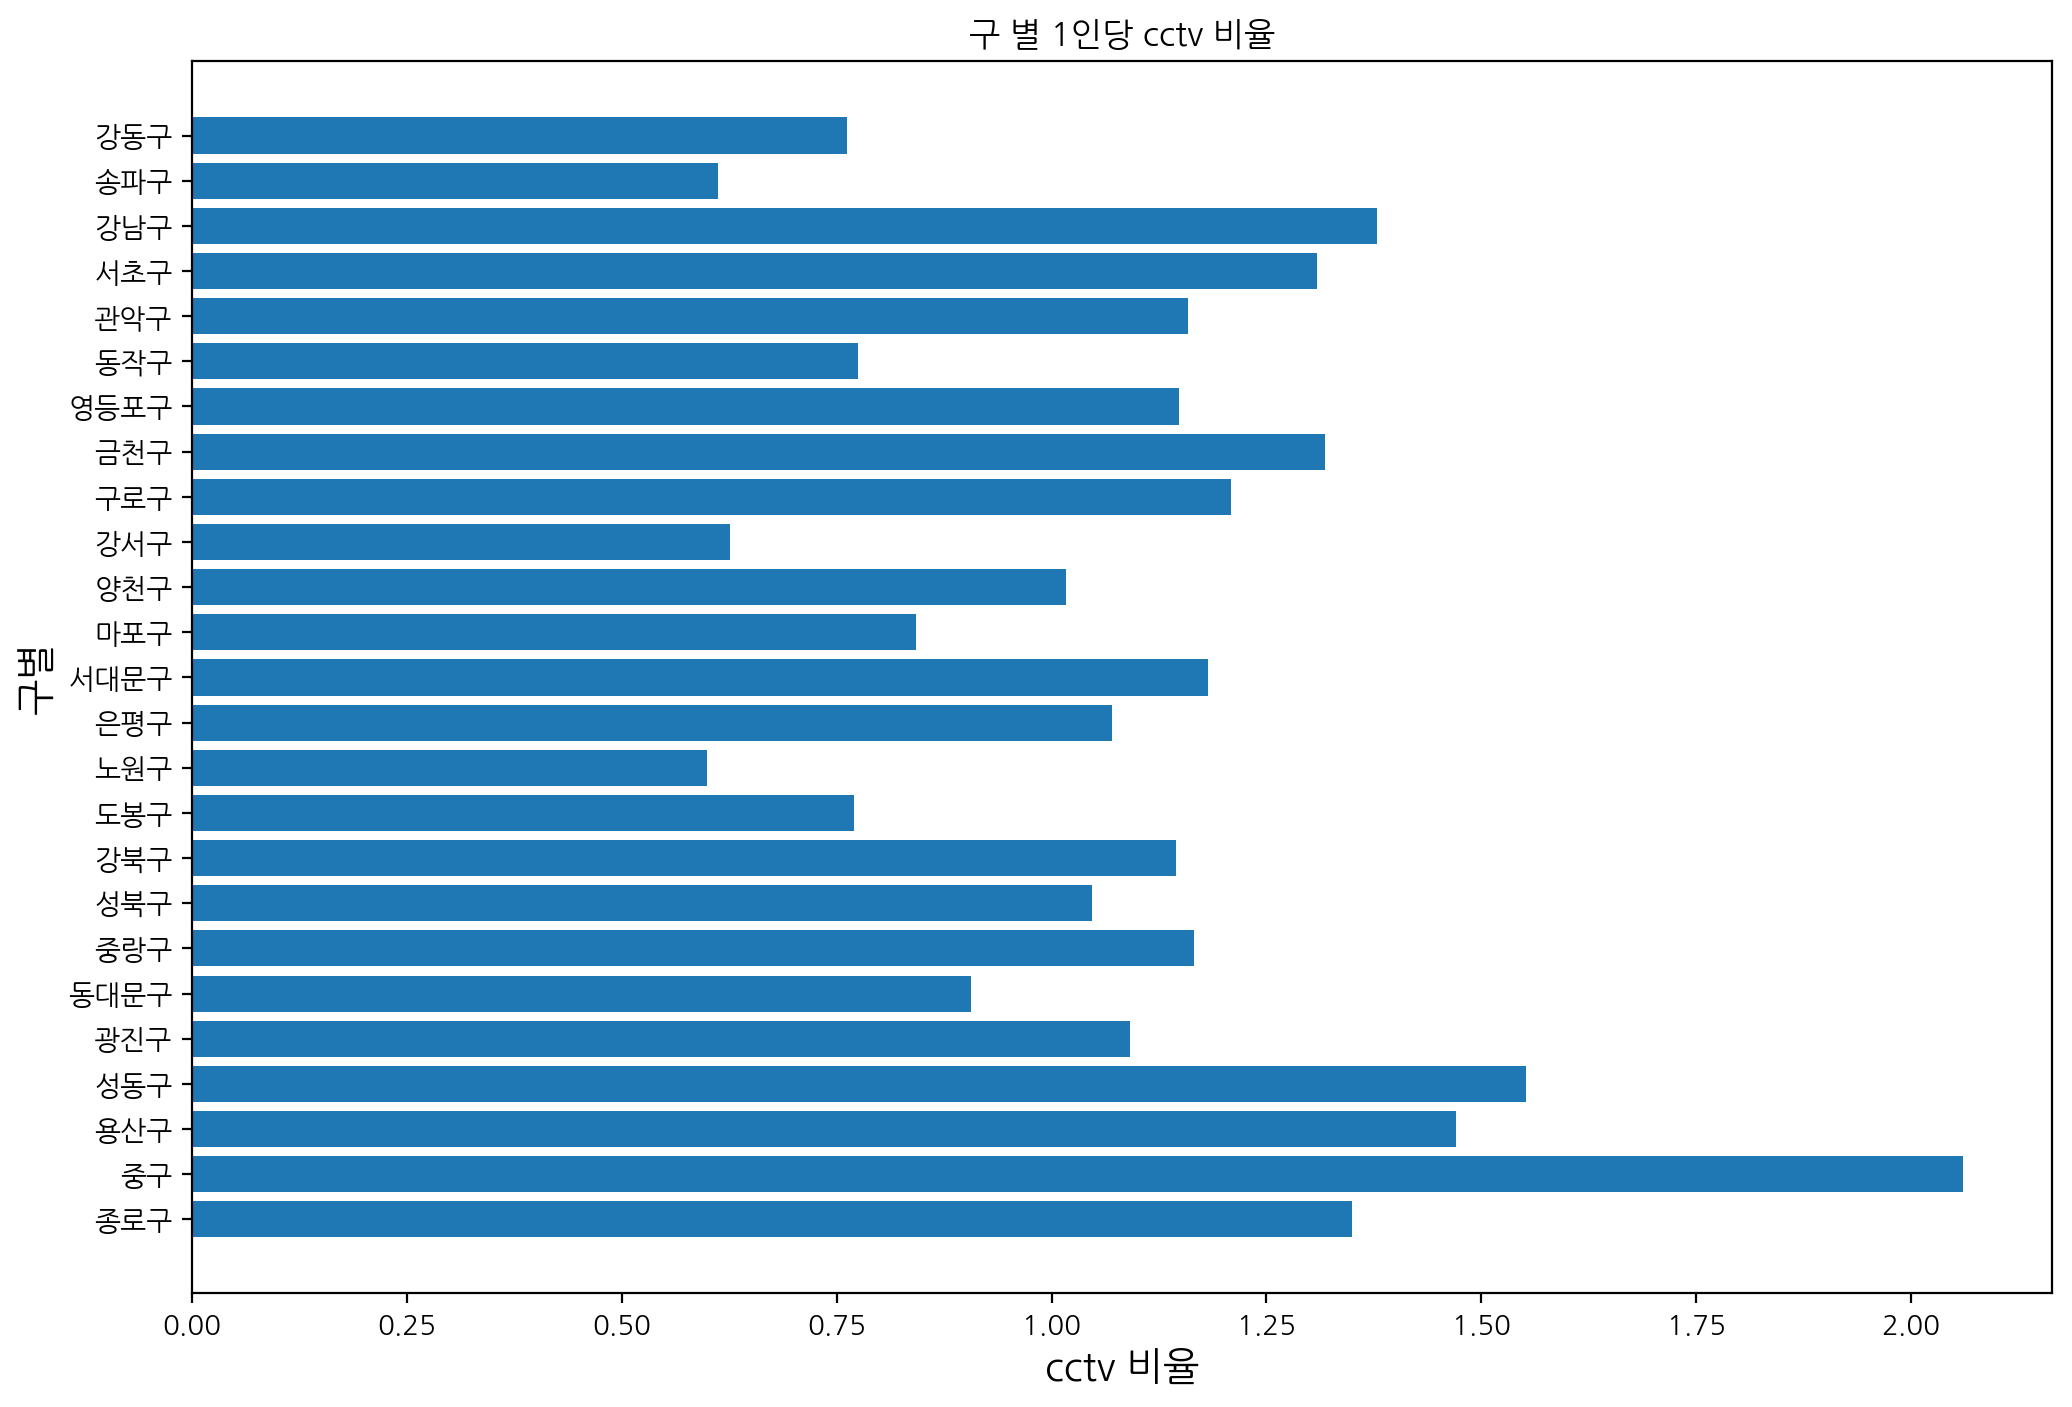

In [ ]:
# 1인당 cctv 비율
plt.figure(figsize=(12,8))
plt.title("구 별 1인당 cctv 비율")
plt.barh(y=df_merge.index, width=df_merge["1인당 cctv 비율"])
plt.xlabel('cctv 비율', fontsize=14)
plt.ylabel('구별', fontsize=14);
# plt.xlim(0.50);

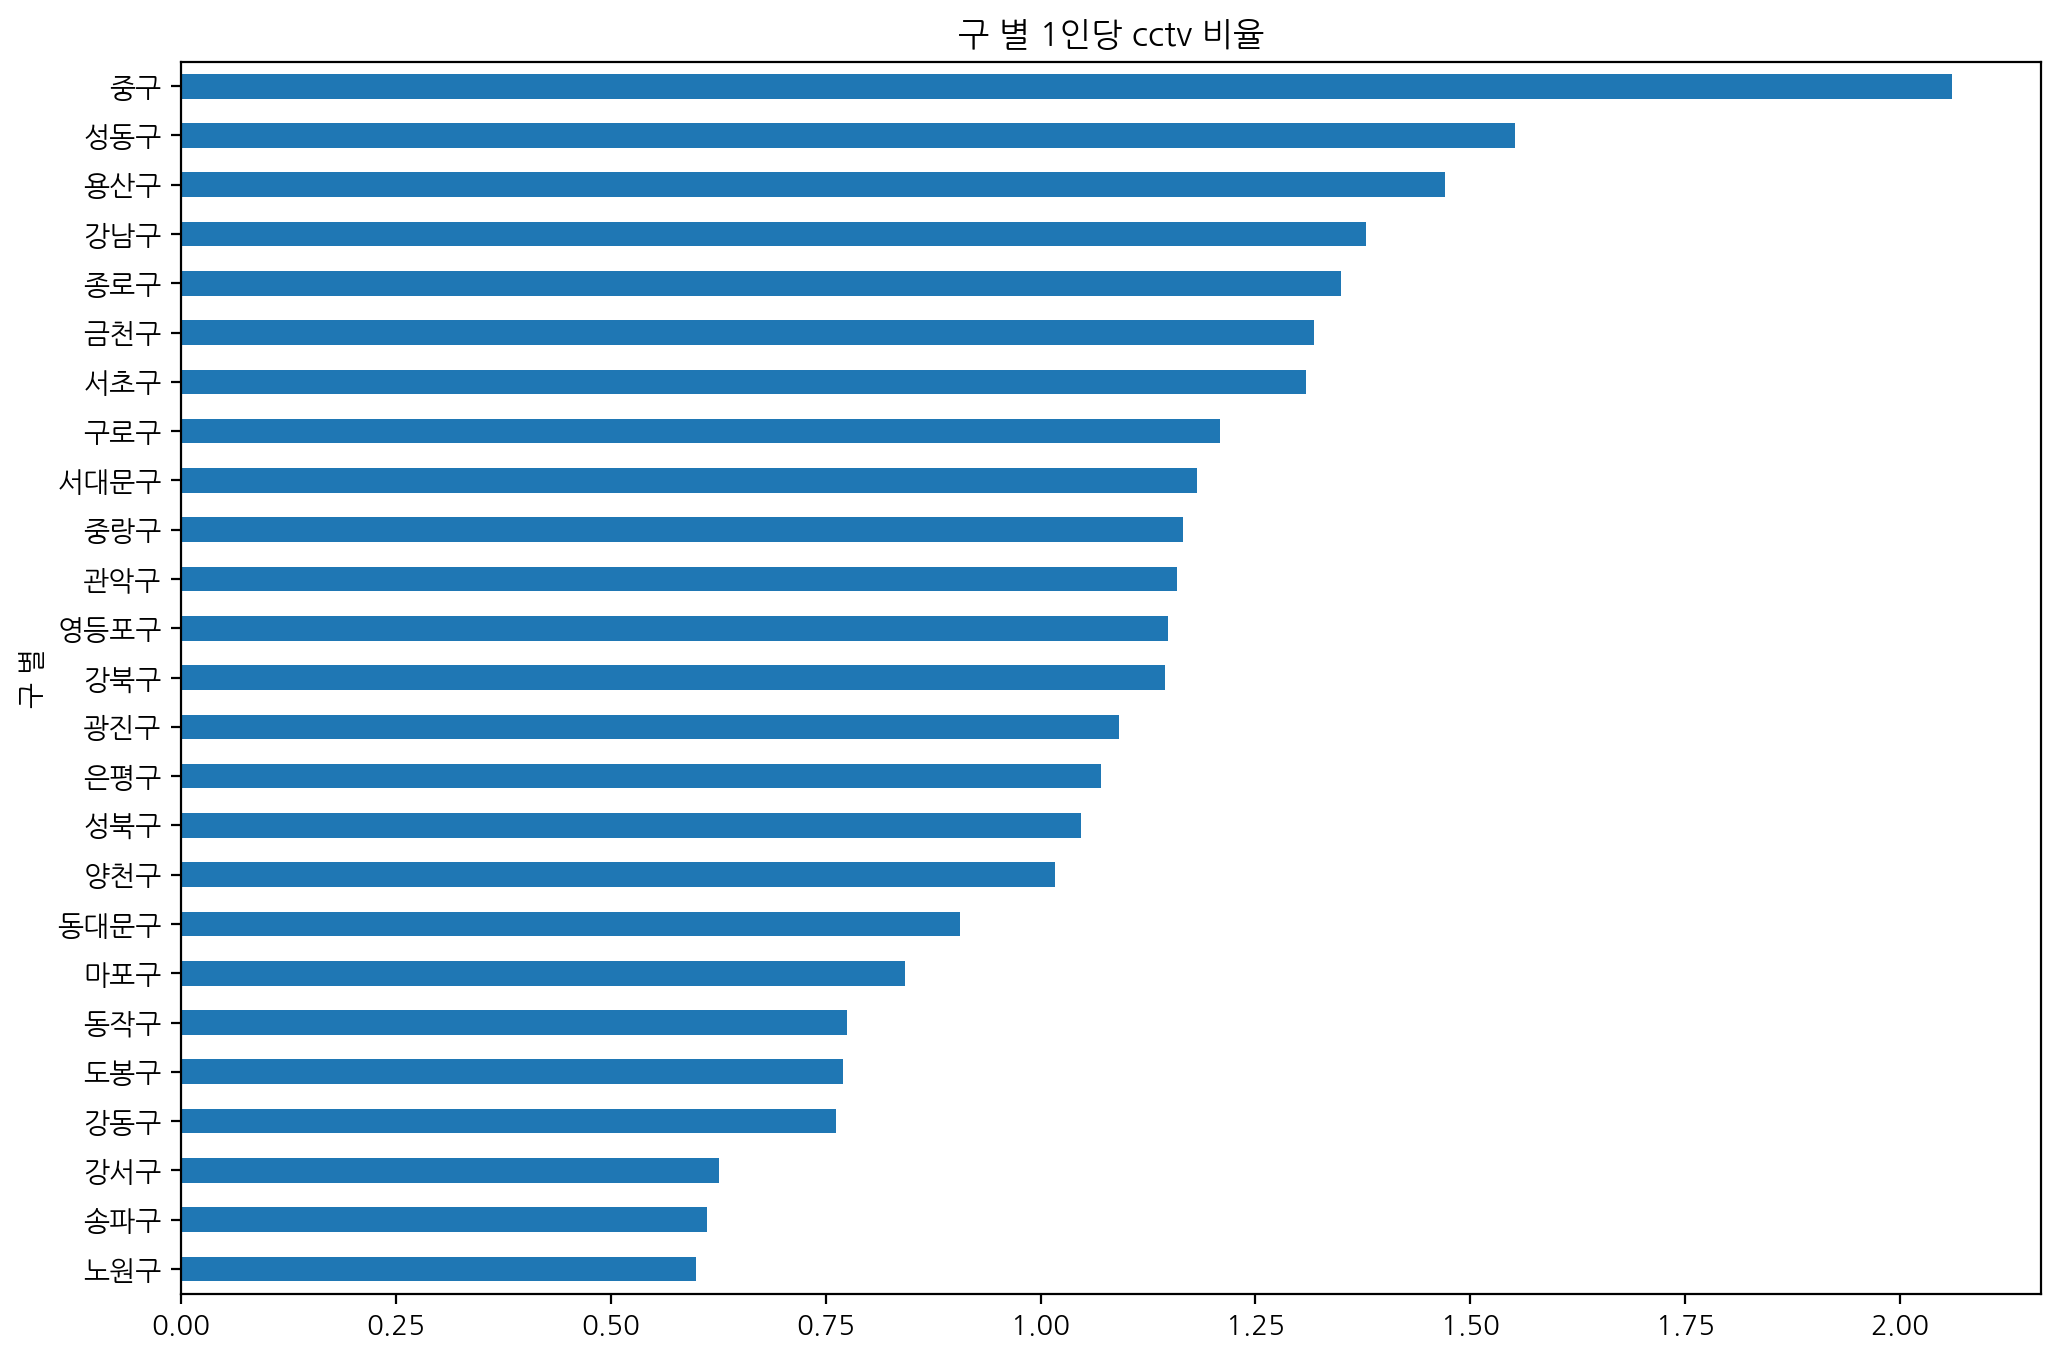

In [ ]:
df_merge["1인당 cctv 비율"].sort_values().plot.barh(figsize=(12,8))
plt.title("구 별 1인당 cctv 비율");

## 5대 범죄

In [ ]:
df_crime = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/5대범죄.xlsx",
                            skiprows=[0,1,2,4], usecols="B:D", thousands=",")
df_crime.head()

,자치구별(2),발생,검거
0,종로구,3138,3284
1,중구,3071,2119
2,용산구,2967,2093
3,성동구,2194,1597
4,광진구,3619,2498


In [ ]:
# 컬럼명 변경

df_crime.columns = ['구 별', '범죄건', '검거건']
df_crime.head()

,구 별,범죄건,검거건
0,종로구,3138,3284
1,중구,3071,2119
2,용산구,2967,2093
3,성동구,2194,1597
4,광진구,3619,2498


In [ ]:
# 인덱스 설정
df_crime.set_index("구 별", inplace=True)
df_crime.head()

,범죄건,검거건
구 별,,
종로구,3138,3284
중구,3071,2119
용산구,2967,2093
성동구,2194,1597
광진구,3619,2498


In [ ]:
# df_merge 와 df_crime 합치기
df_crime_merge = df_merge.merge(df_crime, on=df_crime.index)

In [ ]:
df_crime_merge.rename(columns={"key_0":"구 별"}, inplace=True)
df_crime_merge.set_index("구 별", inplace=True)
df_crime_merge.head()

,2021년,2022년,2023년,2020년 이전,cctv 총계,총인구,한국인,외국인,1인당 cctv 비율,범죄건,검거건
구 별,,,,,,,,,,,
종로구,82,225,300,1424,2031,150447,139432,11015,1.349977,3138,3284
중구,419,137,135,2027,2718,131886,121607,10279,2.060871,3071,2119
용산구,486,500,405,1867,3258,221508,207969,13539,1.470827,2967,2093
성동구,366,233,471,3339,4409,284141,276847,7294,1.551694,2194,1597
광진구,740,273,340,2475,3828,350624,334790,15834,1.091768,3619,2498


In [ ]:
df_crime_merge = df_merge.merge(df_crime, left_index=True, right_index=True)
df_crime_merge.head()

,2021년,2022년,2023년,2020년 이전,cctv 총계,총인구,한국인,외국인,1인당 cctv 비율,범죄건,검거건
구 별,,,,,,,,,,,
종로구,82,225,300,1424,2031,150447,139432,11015,1.349977,3138,3284
중구,419,137,135,2027,2718,131886,121607,10279,2.060871,3071,2119
용산구,486,500,405,1867,3258,221508,207969,13539,1.470827,2967,2093
성동구,366,233,471,3339,4409,284141,276847,7294,1.551694,2194,1597
광진구,740,273,340,2475,3828,350624,334790,15834,1.091768,3619,2498


In [ ]:
# concat 으로 하는 방법
pd.concat([df_merge, df_crime], axis=1).head()

,2021년,2022년,2023년,2020년 이전,cctv 총계,총인구,한국인,외국인,1인당 cctv 비율,범죄건,검거건
구 별,,,,,,,,,,,
종로구,82,225,300,1424,2031,150447,139432,11015,1.349977,3138,3284
중구,419,137,135,2027,2718,131886,121607,10279,2.060871,3071,2119
용산구,486,500,405,1867,3258,221508,207969,13539,1.470827,2967,2093
성동구,366,233,471,3339,4409,284141,276847,7294,1.551694,2194,1597
광진구,740,273,340,2475,3828,350624,334790,15834,1.091768,3619,2498


In [ ]:
# 검거율 = 검거건 / 범죄건 * 100

df_crime_merge['검거율'] = df_crime_merge['검거건'] / df_crime_merge['범죄건'] * 100
df_crime_merge.head()

,2021년,2022년,2023년,2020년 이전,cctv 총계,총인구,한국인,외국인,1인당 cctv 비율,범죄건,검거건,검거율
구 별,,,,,,,,,,,,
종로구,82,225,300,1424,2031,150447,139432,11015,1.349977,3138,3284,104.652645
중구,419,137,135,2027,2718,131886,121607,10279,2.060871,3071,2119,69.000326
용산구,486,500,405,1867,3258,221508,207969,13539,1.470827,2967,2093,70.542636
성동구,366,233,471,3339,4409,284141,276847,7294,1.551694,2194,1597,72.789426
광진구,740,273,340,2475,3828,350624,334790,15834,1.091768,3619,2498,69.024592


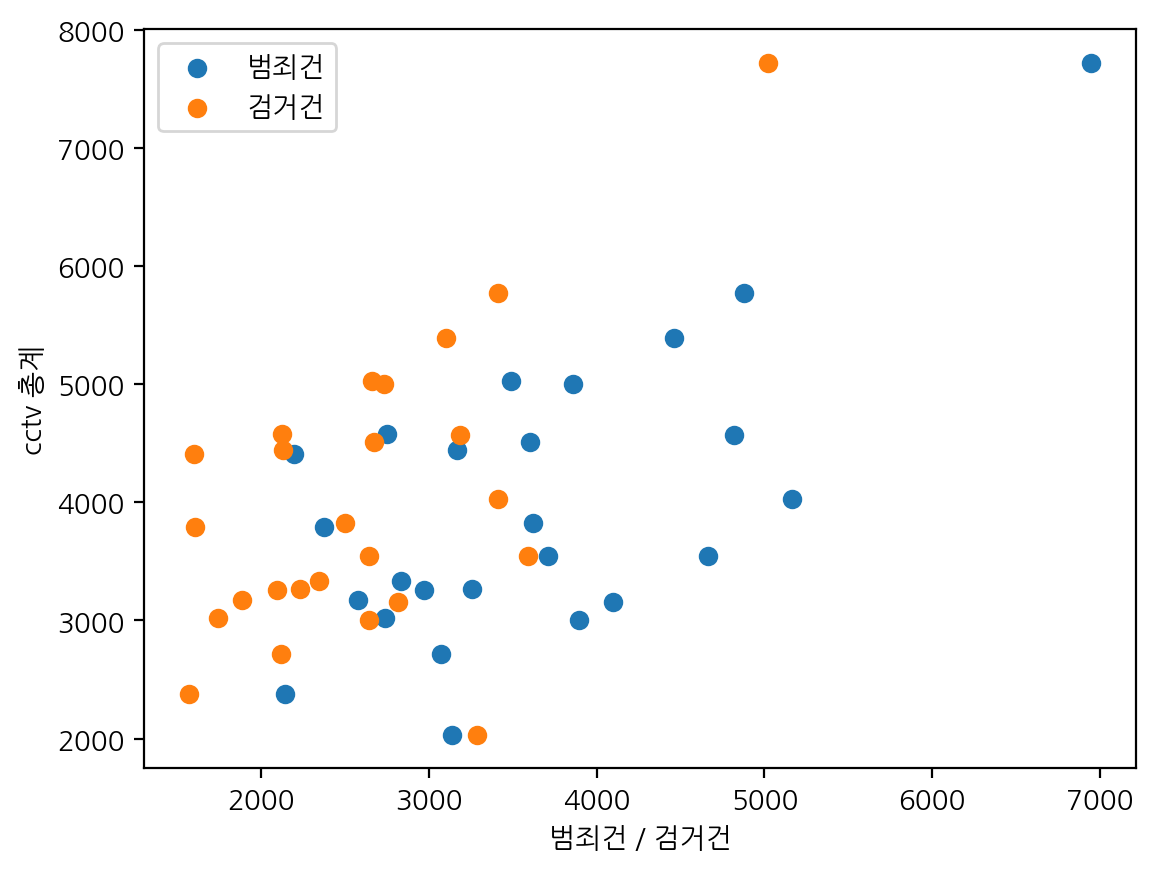

In [ ]:
# scatter : 두 변수 사이의 상관관계 차트

# y축: cctv 총계, x축: 범죄건, 검거건
plt.scatter(y=df_crime_merge['cctv 총계'], x = df_crime_merge['범죄건'])
plt.scatter(y=df_crime_merge['cctv 총계'], x = df_crime_merge['검거건'])
plt.legend(['범죄건', '검거건'])
plt.xlabel('범죄건 / 검거건')
plt.ylabel('cctv 총계');

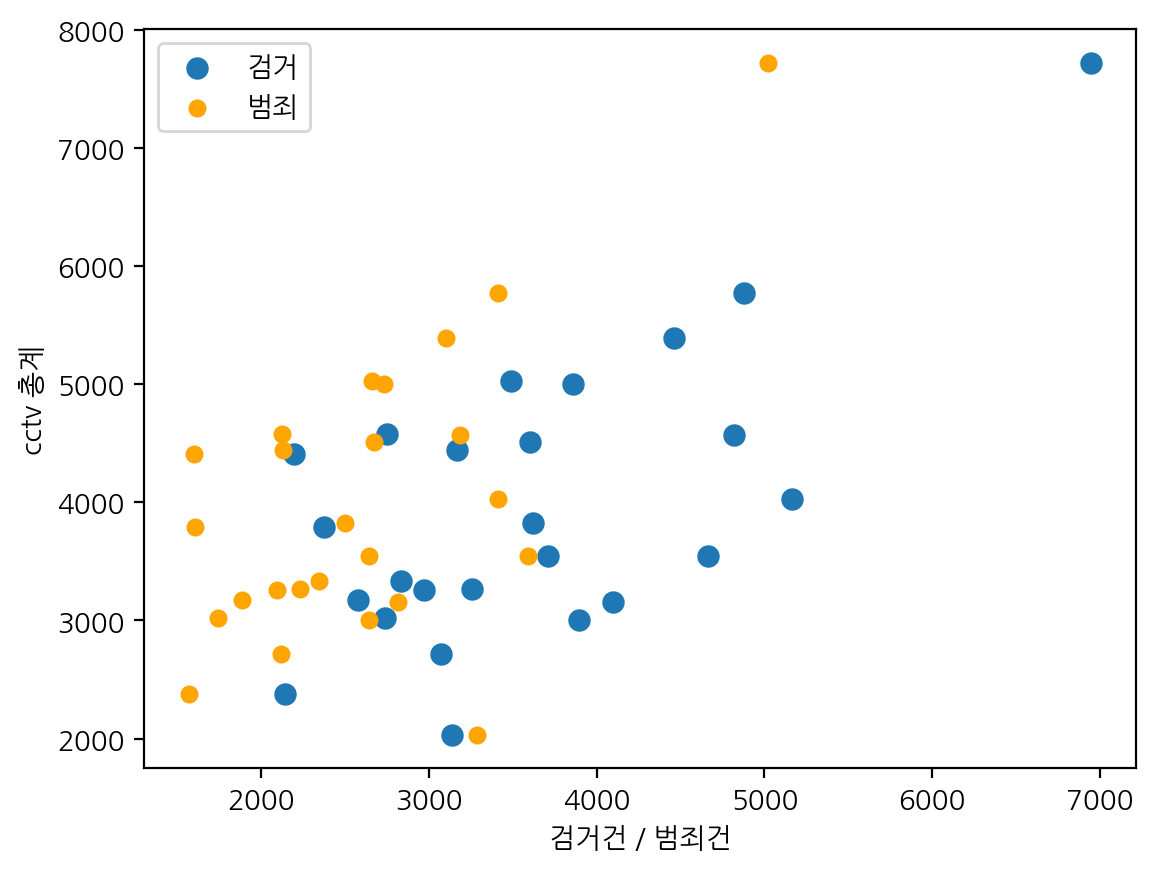

In [ ]:
ax = df_crime_merge.plot.scatter(x='범죄건', y='cctv 총계', s=50, label="검거")
df_crime_merge.plot.scatter(x='검거건', y='cctv 총계', ax= ax, color='orange', s=30, label="범죄")
plt.xlabel('검거건 / 범죄건');